In [28]:
from keras.datasets import imdb
import numpy as np

In [41]:
num_words=10000
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=num_words)
word_index=dict()
for (k,v) in imdb.get_word_index().items():
    word_index[v]=k

In [188]:
def print_a_sample(sample):
    review=' '.join([word_index[i] for i in train_data[sample]])
    rating=train_labels[sample]
    print(review)
    print(list(train_data[sample]))
    print("Words: " + str(len(train_data[sample])))
    print("Unique Words: " + str(len(np.unique(train_data[sample]))))
    print("Rating: " + str(rating))

print_a_sample(3000)

the social social he an listen studio absolute unexpected or is and br choices that introduce horror her how br an as it is tied surprise for bollywood will and much is ignorance got subjected like represents she melt to confusing an of decent like unbelievably of number some br made no all with this family's during big why have me director in another film not as you book i'm of every grandma movie an of because amusing complications dvd or of simple in of awful repeated unnecessary want in shakespeare's musical no is narration proceed it experience to musical no of direction into performing bad does of isolation who years while perhaps studio characters uninspired of glass and up to up who of stay episode we air have back like this were times second it part in possibly is under br distinguished this is seemed worn and this of husband br of left to out possibly about some br of outstanding go evil an including to branagh who 1979 end for could think imagination actor they an i i cerebr

In [84]:
def vectorise_all_samples(my_train_test_data,up_to_sample=25000):
    x=np.zeros((len(my_train_test_data[:up_to_sample]),num_words))
    for (i,sample) in enumerate(my_train_test_data[:up_to_sample]):
        x[i,my_train_test_data[i]]=1
    print(x.shape)
    print(x.sum(axis=1))
    return x

x_train=vectorise_all_samples(train_data,up_to_sample=len(train_data))
x_test=vectorise_all_samples(test_data,up_to_sample=len(test_data))

y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

print(x_train.shape,x_test.shape,y_train.shape,y_train.shape)

(25000, 10000)
[120. 121.  97. ... 116.  99.  95.]
(25000, 10000)
[ 47. 153. 280. ...  63.  69. 110.]
(25000, 10000) (25000, 10000) (25000,) (25000,)


In [181]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Dense(16,activation='tanh',input_shape=(num_words,)))
model.add(layers.Dense(1,activation='sigmoid'))

In [182]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss=losses.mse,
              metrics=[metrics.binary_accuracy])

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 153us/step - loss: 0.1750 - binary_accuracy: 0.7973 - val_loss: 0.1346 - val_binary_accuracy: 0.8655
Epoch 2/10
15000/15000 [==============================] - 2s 127us/step - loss: 0.1073 - binary_accuracy: 0.8996 - val_loss: 0.1078 - val_binary_accuracy: 0.8758
Epoch 3/10
15000/15000 [==============================] - 2s 129us/step - loss: 0.0799 - binary_accuracy: 0.9231 - val_loss: 0.0932 - val_binary_accuracy: 0.8866
Epoch 4/10
15000/15000 [==============================] - 2s 128us/step - loss: 0.0636 - binary_accuracy: 0.9365 - val_loss: 0.0864 - val_binary_accuracy: 0.8894
Epoch 5/10
15000/15000 [==============================] - 2s 128us/step - loss: 0.0522 - binary_accuracy: 0.9489 - val_loss: 0.0851 - val_binary_accuracy: 0.8886
Epoch 6/10
15000/15000 [==============================] - 2s 128us/step - loss: 0.0438 - binary_accuracy: 0.9579 - val_loss: 0.0837 - val_bi

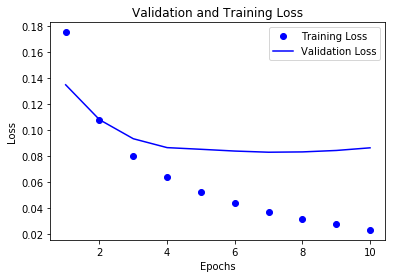

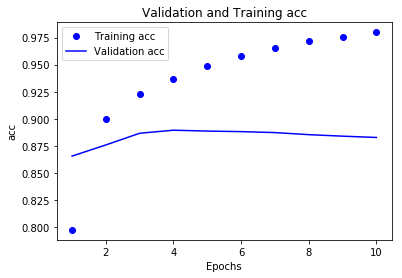

In [183]:
import matplotlib.pyplot as plt
def plot_train_history(history):
    h_dict=history.history
    print(h_dict.keys())
    epochs=range(1,len(h_dict['binary_accuracy'])+1)
    
    plt.plot(epochs,h_dict['loss'],'bo',label='Training Loss')
    plt.plot(epochs,h_dict['val_loss'],'b',label='Validation Loss')
    plt.title('Validation and Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(epochs,h_dict['binary_accuracy'],'bo',label='Training acc')
    plt.plot(epochs,h_dict['val_binary_accuracy'],'b',label='Validation acc')
    plt.title('Validation and Training acc')
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()
    plt.show()
    
    
def validate_model(model,val_samples):
    x_val=x_train[:val_samples]
    x_train_partial=x_train[val_samples:]

    y_val=y_train[:val_samples]
    y_train_partial=y_train[val_samples:]

    history=model.fit(x_train_partial,
                      y_train_partial,
                      epochs=10,
                      batch_size=512,
                      validation_data=(x_val,y_val),)
    plot_train_history(history)
    
validate_model(model,10000)

In [184]:
history=model.fit(x_train,
                  y_train,
                  epochs=4,
                  batch_size=512,
                  validation_data=(x_val,y_val),)

Train on 25000 samples, validate on 1000 samples
Epoch 1/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.0462 - binary_accuracy: 0.9438 - val_loss: 0.0633 - val_binary_accuracy: 0.9180
Epoch 2/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.0380 - binary_accuracy: 0.9558 - val_loss: 0.0493 - val_binary_accuracy: 0.9440
Epoch 3/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.0329 - binary_accuracy: 0.9626 - val_loss: 0.0423 - val_binary_accuracy: 0.9510
Epoch 4/4
25000/25000 [==============================] - 2s 89us/step - loss: 0.0285 - binary_accuracy: 0.9696 - val_loss: 0.0366 - val_binary_accuracy: 0.9620


In [185]:
results = model.evaluate(x_test, y_test)
print(results)


25000/25000 [==============================] - 2s 88us/step
[0.09881136383473874, 0.87168]


In [161]:
model.predict(x_test)

array([[0.19449472],
       [0.9997993 ],
       [0.71854687],
       ...,
       [0.09560154],
       [0.05522196],
       [0.6352313 ]], dtype=float32)